### You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

### 1. Pregnancies: Number of times pregnant (integer)

### 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

### 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

### 4. SkinThickness: Triceps skin fold thickness (mm) (integer)

### 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

### 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

### 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

### 8. Age: Age in years (integer)

### 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [2]:
import pandas as pd
file_path= 'F:\\vaibhav\\PW teaching jypiter\\Decision tree\\diabetes.csv'
df= pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


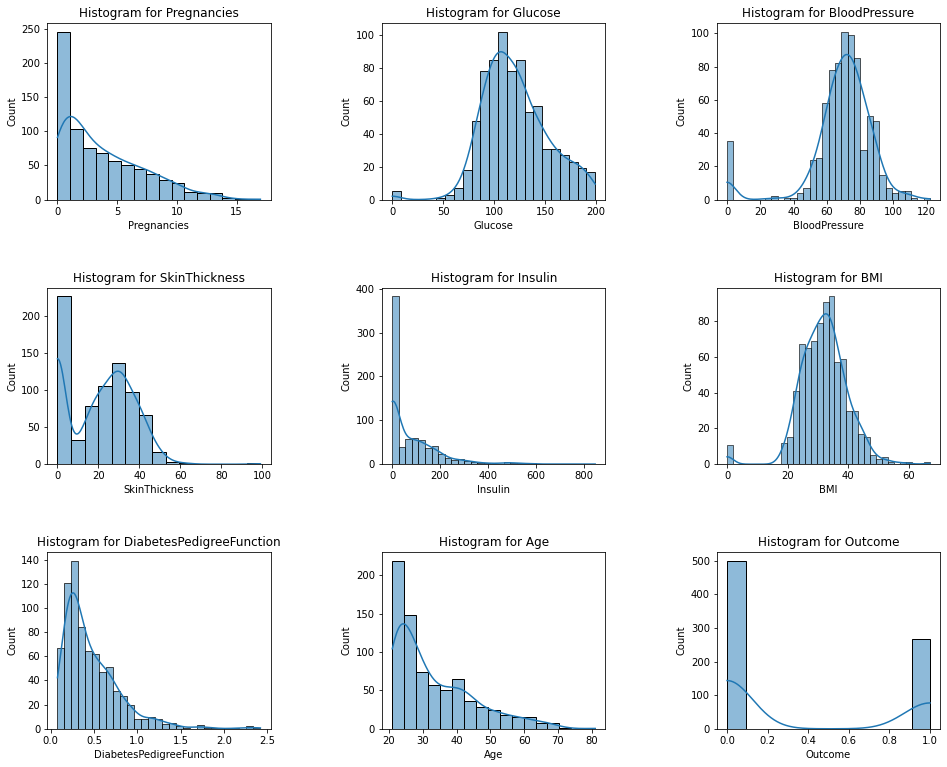

In [6]:
#univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust( top = 0.99, bottom=0.01,hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true')
    plt.title(f'Histogram for {i}')
plt.show()

In [7]:
# Describe dataset by grouping by outcome
df.groupby(by='Outcome').describe().T

Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]

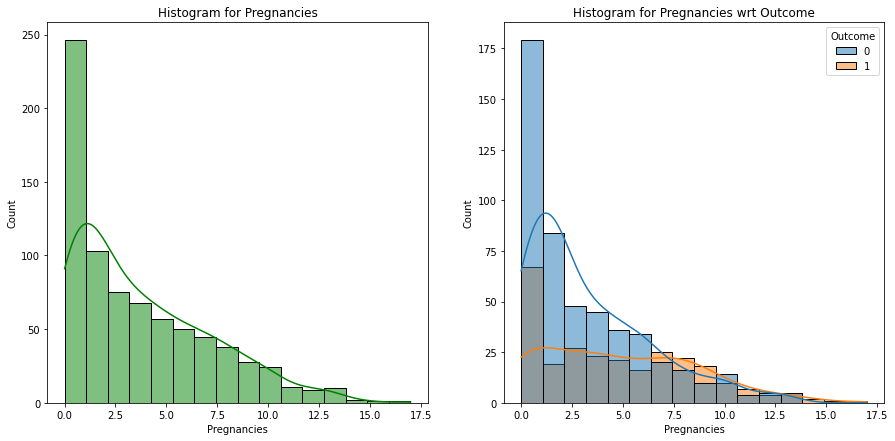

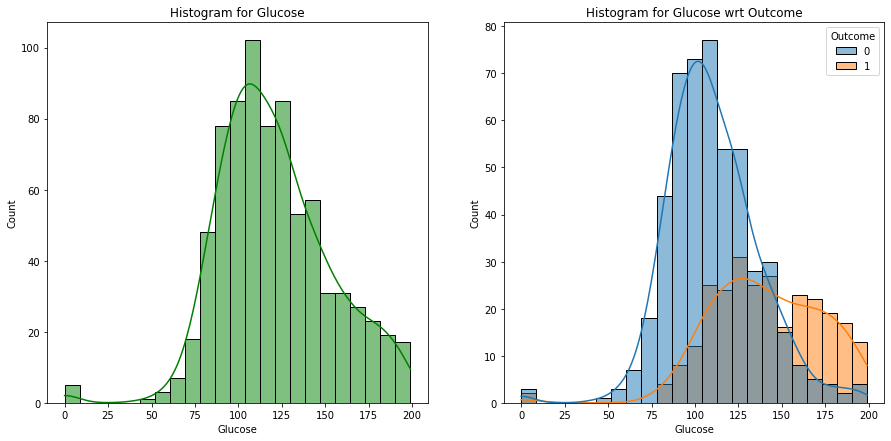

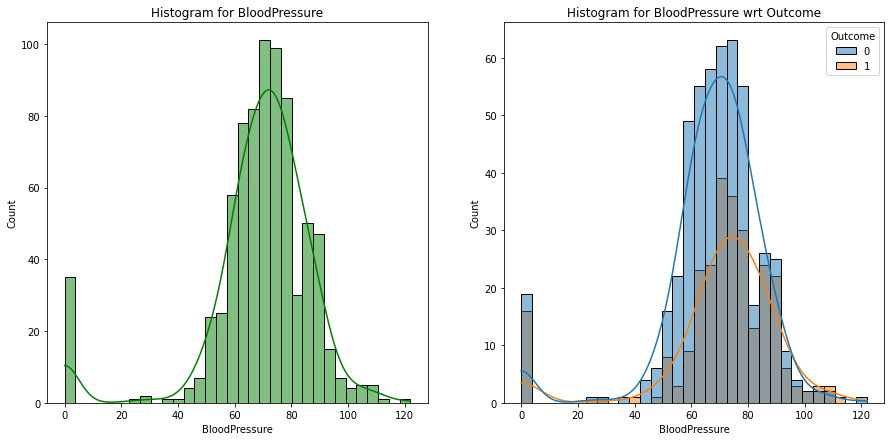

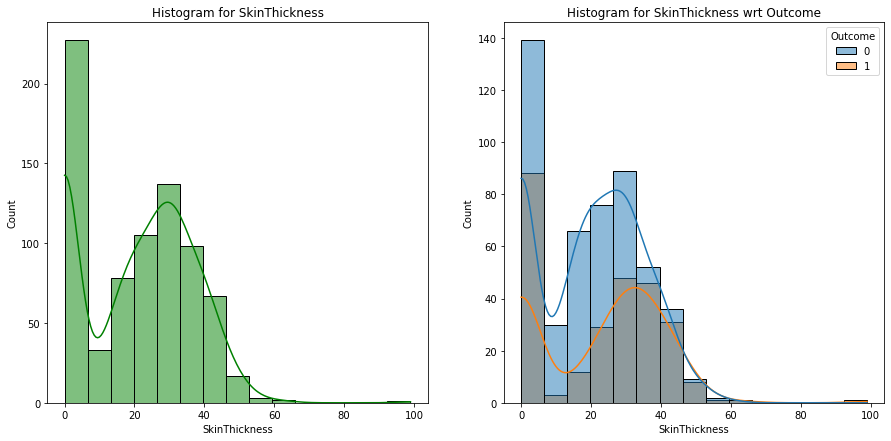

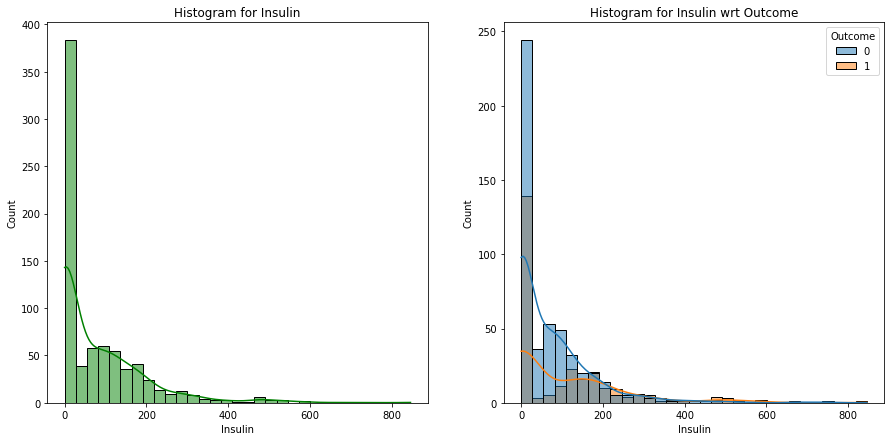

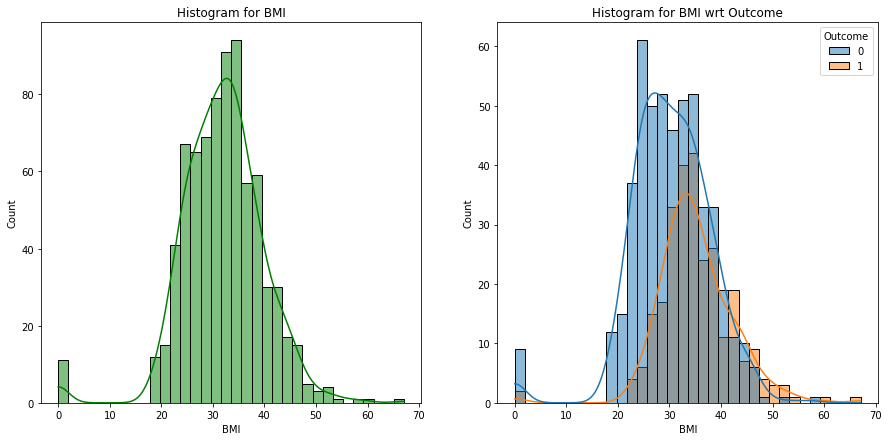

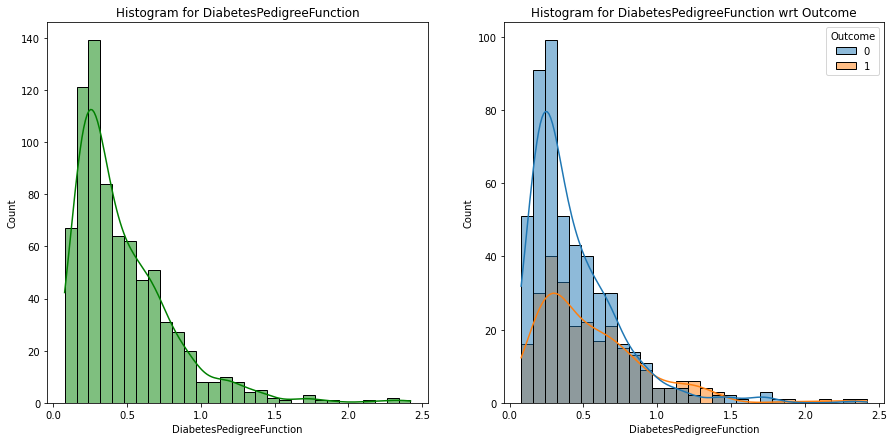

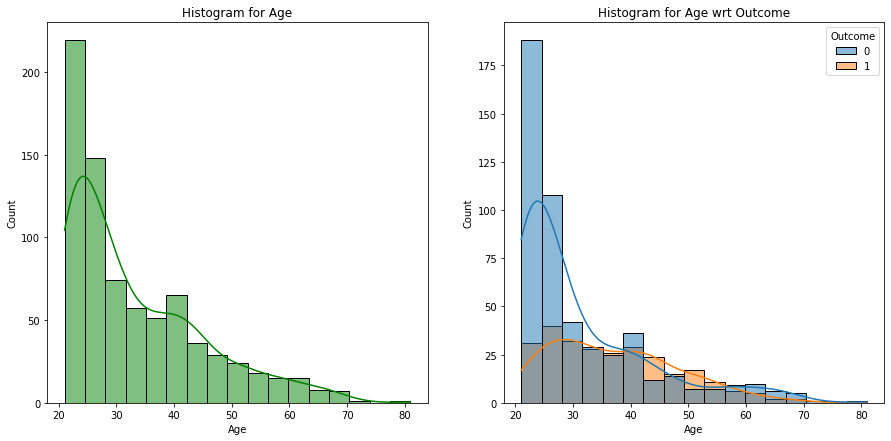

In [8]:
# Univariate Analysis
for i in df.columns:
    if i != 'Outcome':
        fig, ax = plt.subplots(1,2,figsize=(15,7))
        plt.subplot(121)
        sns.histplot(data=df,x=i,kde=True,bins='fd',color='g')
        plt.title(f'Histogram for {i}')
        plt.subplot(122)
        sns.histplot(data=df,x=i,kde=True,bins='fd',hue='Outcome')
        plt.title(f'Histogram for {i} wrt Outcome')
        plt.show()

In [9]:
# Correlation
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

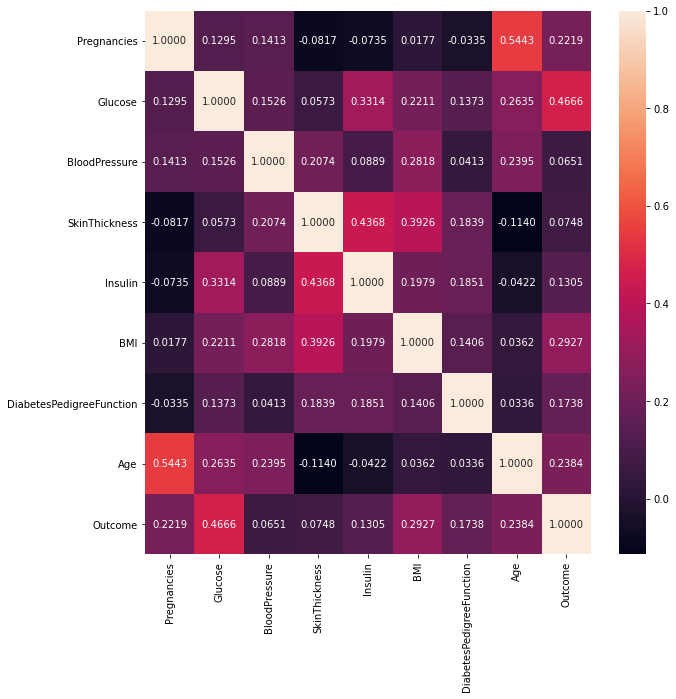

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,fmt='.4f')

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

### From univariate analysis

 ### Glucose, Skin Thickness , Insulin , BMI, Blood Pressure feature has 0 values which does not make sense, replace this 0 values with median.

In [11]:
zero_value_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

print('Zero Values in column:')
for i in zero_value_col:
    print(f'{i} : {len(df[df[i]==0])}')

Zero Values in column:
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [12]:
for i in zero_value_col:
    df[i]= df[i].replace(0,df[i].median())

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:


columns_to_check = df.columns


def remove_outliers_iqr(data, columns):
    for column in columns:
        
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a mask to identify outliers
        outlier_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
        
        # Remove outliers
        data = data[~outlier_mask]
    
    return data

# Remove outliers based on IQR
df_no_outliers_iqr = remove_outliers_iqr(df, columns_to_check)

# Display the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers (IQR method):", df_no_outliers_iqr.shape)


Shape before removing outliers: (768, 9)
Shape after removing outliers (IQR method): (615, 9)


###  As there is  no categorical columns present so no One Hot encoding required.

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [15]:
# Seperate Dependent and Independent Variables
X = df.drop(labels=['Outcome'],axis=1)
y= df[['Outcome']]

In [16]:
X.head(

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.25, random_state=42)

In [18]:
Xtrain.shape

(576, 8)

In [19]:
Xtest.shape

(192, 8)

In [20]:
565+55

620

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [21]:
parameters ={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(1,13)),
    'max_features':['sqrt','log2']
}

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid= parameters, cv=5, scoring='roc_auc')

gscv.fit(Xtrain, ytrain)

C:\Users\SAMPADA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAMPADA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAMPADA\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\SAMPADA\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\SAMPADA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [23]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [24]:
gscv.best_score_

0.7941762483130904

In [25]:
dtc_best = gscv.best_estimator_

In [26]:
dtc_best.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, max_features='log2')

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [28]:
ytest_predict = dtc_best.predict(Xtest)

In [29]:
accuracy = accuracy_score(ytest, ytest_predict)
precision = precision_score(ytest, ytest_predict)
recall = recall_score(ytest, ytest_predict)
f1 = f1_score(ytest, ytest_predict)

In [30]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7083333333333334
Precision: 0.6181818181818182
Recall: 0.4927536231884058
F1 Score: 0.5483870967741936


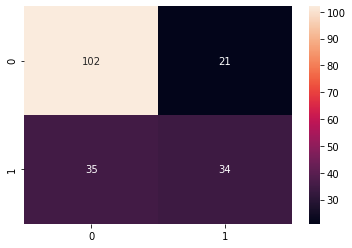

In [31]:
cf = confusion_matrix(ytest, ytest_predict)
sns.heatmap(cf, annot=True,fmt='d')
plt.show()

In [32]:
ypred_prob = dtc_best.predict_proba(Xtest)[:,-1]
auc= roc_auc_score(ytest,ypred_prob)

print(f'ROC-AUC Score for the model is : {auc:.4f}')

ROC-AUC Score for the model is : 0.7448


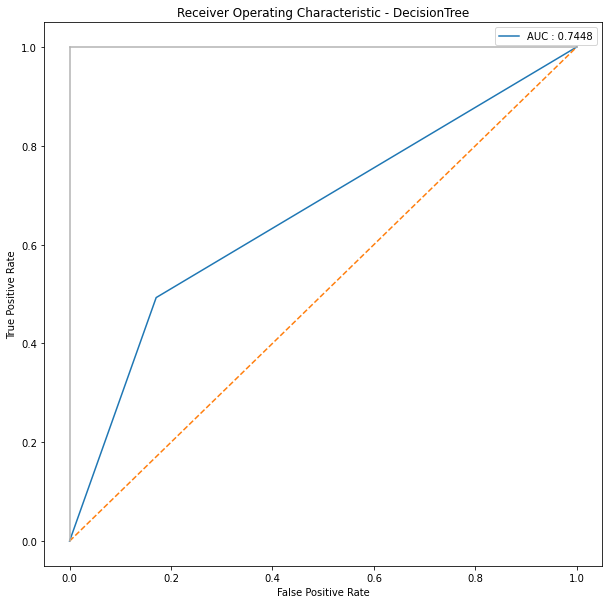

In [33]:
fpr, tpr, thr = roc_curve(ytest,ytest_predict)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr, label=f'AUC : {auc:.4f}')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

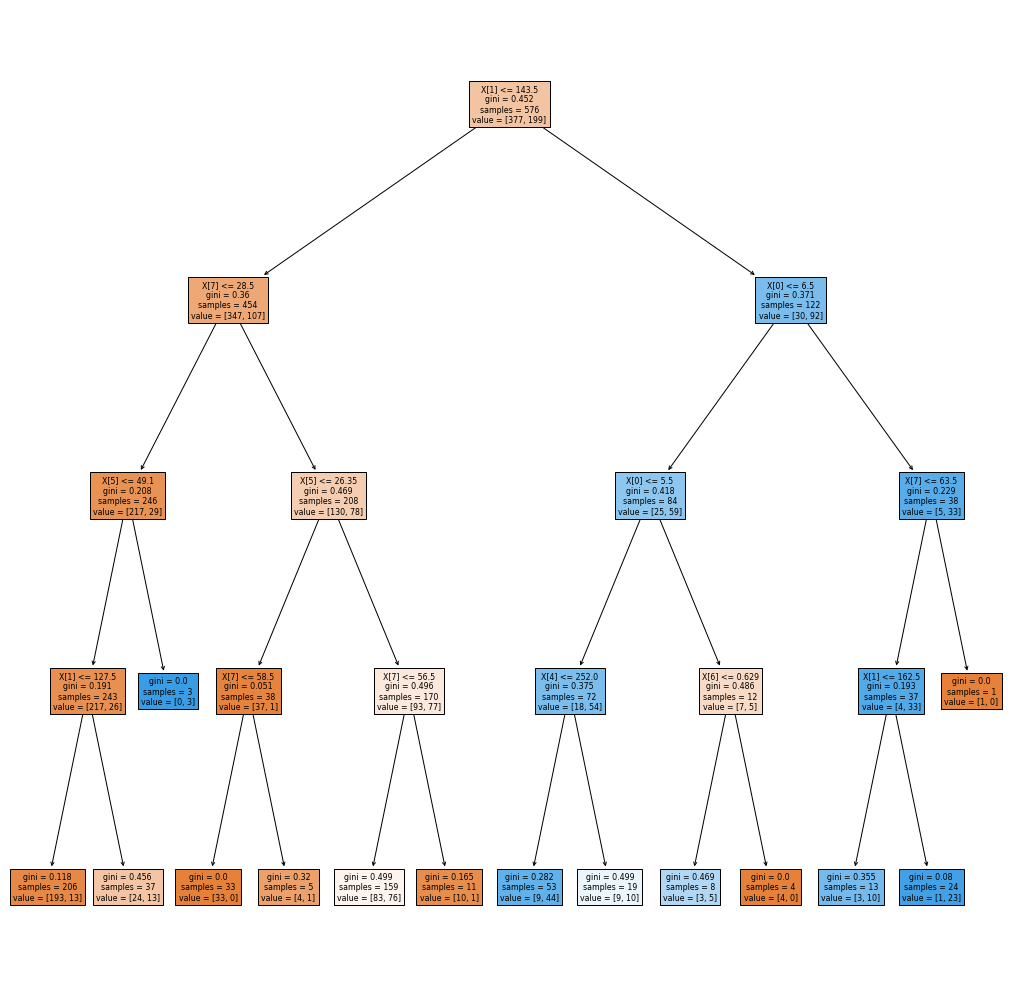

In [34]:
from sklearn import tree
plt.figure(figsize=(18,18))
tree.plot_tree(dtc_best,filled=True)
plt.show()

In [38]:
imp= dtc_best.feature_importances_
imp= pd.Series(imp)
imp.index= Xtrain.columns
imp= imp.sort_values(ascending= False)
imp

Glucose                     0.564801
Age                         0.195274
BMI                         0.157471
Pregnancies                 0.036621
Insulin                     0.025370
DiabetesPedigreeFunction    0.020463
BloodPressure               0.000000
SkinThickness               0.000000
dtype: float64

<AxesSubplot:title={'center':'Feature Importances'}, ylabel='Importance'>

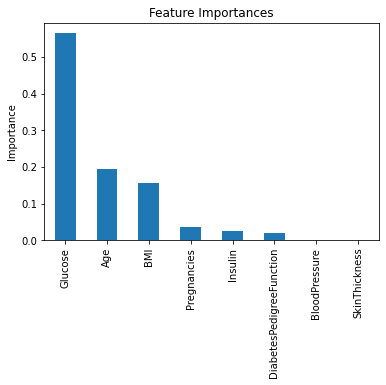

In [39]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')


### Top 4 most important Features for Predicting Diabetes are :
1. Glucose
2. Pregnancies
3. BMI
4. Age

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [57]:
patient = {
    'Pregnancies':[2],
    'Glucose':[195],
    'BloodPressure':[80],
    'SkinThickness':[45],
    'Insulin':[512],
    'BMI':[31],
    'DiabetesPedigreeFunction':[0.160],
    'Age':[55]
}


In [58]:
df_data = pd.DataFrame(patient)
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,195,80,45,512,31,0.16,55


In [59]:
pred = dtc_best.predict(df_data)[0]
pred

1

In [60]:
if pred==1:
    print('Patient is Diabetic')
    print(f'Probbaibility of diabetic : {dtc_best.predict_proba(df_data)[0][1]}')
else:
    print('Patient is non Diabetic')
    print(f'Probaibility of diabetic : {dtc_best.predict_proba(df_data)[0][1]}')

Patient is Diabetic
Probbaibility of diabetic : 0.5263157894736842


In [61]:
from warnings import filterwarnings
filterwarnings('ignore')

In [63]:
%pip install lime

Note: you may need to restart the kernel to use updated packages.


In [66]:
from lime.lime_tabular import LimeTabularExplainer
features = list(Xtrain.columns)
explainer = LimeTabularExplainer(Xtrain.values,
                                 feature_names=features,
                                 class_names=[0,1],
                                 verbose=True,
                                 mode='classification')

In [68]:
exp = explainer.explain_instance(df_data.values.flatten(),dtc_best.predict_proba,num_features=Xtrain.shape[1])

Intercept 0.20859263697473276
Prediction_local [0.84020438]
Right: 0.5263157894736842


In [69]:
exp.show_in_notebook(show_table=True)